In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn;

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #pelatihan data

from sklearn.cluster import KMeans #model data mining
from sklearn.preprocessing import StandardScaler  #standarisasi
#evaluasi model
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score 
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

In [4]:
data = pd.read_csv('HousePriceTrain.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Memeriksa apakah ada nilai dalam dataset yang "kosong" atau "NaN"
print(data.isnull().values.any())

True


In [4]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
data = data.fillna(data.mean(numeric_only=True))
print(data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [8]:
# Memilih fitur (features) dan target
features = ['OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = data[features]
y = data['SalePrice']

In [10]:
print (X)
print (y)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  \
0               7       1710           2         548          856         2   
1               6       1262           2         460         1262         2   
2               7       1786           2         608          920         2   
3               7       1717           3         642          756         1   
4               8       2198           3         836         1145         2   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647           2         460          953         2   
1456            6       2073           2         500         1542         2   
1457            7       2340           1         252         1152         2   
1458            5       1078           1         240         1078         1   
1459            5       1256           1         276         1256         1   

      YearBuilt  
0          2003  
1          1976

In [ ]:
# Standarisasi fitur [lihat materi minggu ke-1]
scaler = StandardScaler() #Menginisialisasi objek StandardScaler dari sklearn.preprocessing

#Menghitung rata-rata dan sebaran setiap kolom dalam X, 
# lalu menyesuaikan nilai-nilai agar setiap kolom berpusat di sekitar 0 dengan sebaran seragam
X_scaled = scaler.fit_transform(X) 

In [9]:
print(X)
print(X_scaled)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  \
0               7       1710           2         548          856         2   
1               6       1262           2         460         1262         2   
2               7       1786           2         608          920         2   
3               7       1717           3         642          756         1   
4               8       2198           3         836         1145         2   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647           2         460          953         2   
1456            6       2073           2         500         1542         2   
1457            7       2340           1         252         1152         2   
1458            5       1078           1         240         1078         1   
1459            5       1256           1         276         1256         1   

      YearBuilt  
0          2003  
1          1976

**Bagi dataset menjadi data latih dan data uji**

In [ ]:
# Membagi data menjadi data latih (80%) dan data uji (20%) secara acak, 
# dengan memastikan hasil yang konsisten menggunakan random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1168, 7)
Shape of X_test: (292, 7)
Shape of Y_train: (1168,)
Shape of Y_test: (292,)


In [24]:
from sklearn.cluster import KMeans
# Inisialisasi model K-Means dengan jumlah cluster
kmeans = KMeans(n_clusters=4, random_state=42)
# Latih model menggunakan data
kmeans.fit(X_scaled)
# Dapatkan label cluster
labels = kmeans.labels_

In [23]:
print(kmeans.fit(X_scaled))
print("Nama clusternya:", np.unique(labels))

KMeans(n_clusters=4, random_state=42)
Nama clusternya: [0 1 2 3]


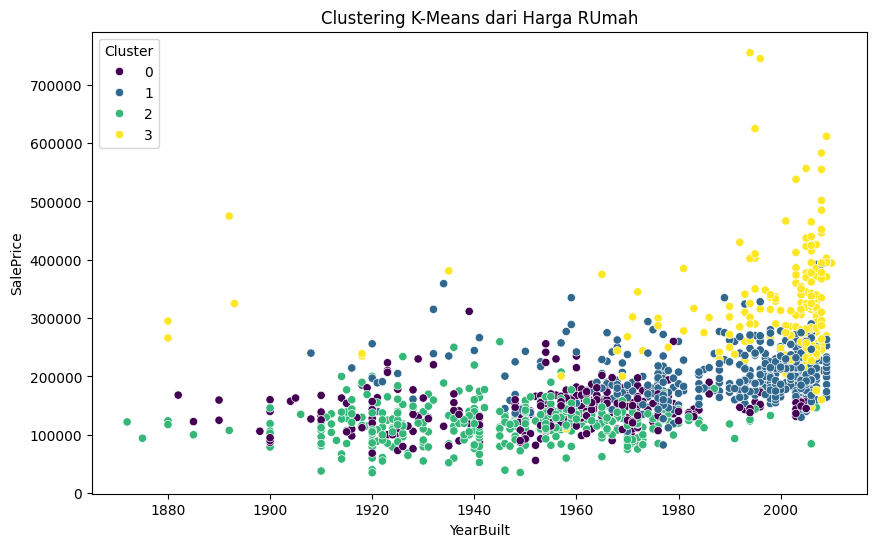

In [28]:
# Tambahkan label cluster ke data asli
data['Cluster'] = labels #Menambahkan kolom yang bernama CLuster diisi dengan labels

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='YearBuilt', y='SalePrice',
hue='Cluster', palette='viridis')
plt.title('Clustering K-Means dari Harga RUmah')
plt.show()

In [15]:
# Menghitung metrik evaluasi untuk menilai hasil klustering
sil_score = silhouette_score(X_scaled, labels)  # Mengukur seberapa baik data dalam kluster yang sama berkumpul
db_index = davies_bouldin_score(X_scaled, labels)  # Mengukur seberapa baik kluster terpisah satu sama lain (lebih rendah lebih baik)
ch_index = calinski_harabasz_score(X_scaled, labels)  # Mengukur kepadatan dan pemisahan antar kluster (lebih tinggi lebih baik)
ari = adjusted_rand_score(y, labels)  # Mengukur kesesuaian kluster dengan label sebenarnya
nmi = normalized_mutual_info_score(y, labels)  # Mengukur kesamaan informasi antara kluster dan label sebenarnya (0-1)

# Menampilkan hasil metrik evaluasi untuk mengetahui kualitas klustering
print("Silhouette Score: ", sil_score)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)
print("Adjusted Rand Index: ", ari)
print("Normalized Mutual Information: ", nmi)


Silhouette Score:  0.2803994902047003
Davies-Bouldin Index: 1.3477935189682824
Calinski-Harabasz Index: 648.5081029020055
Adjusted Rand Index:  0.004024652767344318
Normalized Mutual Information:  0.24875257979448157


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

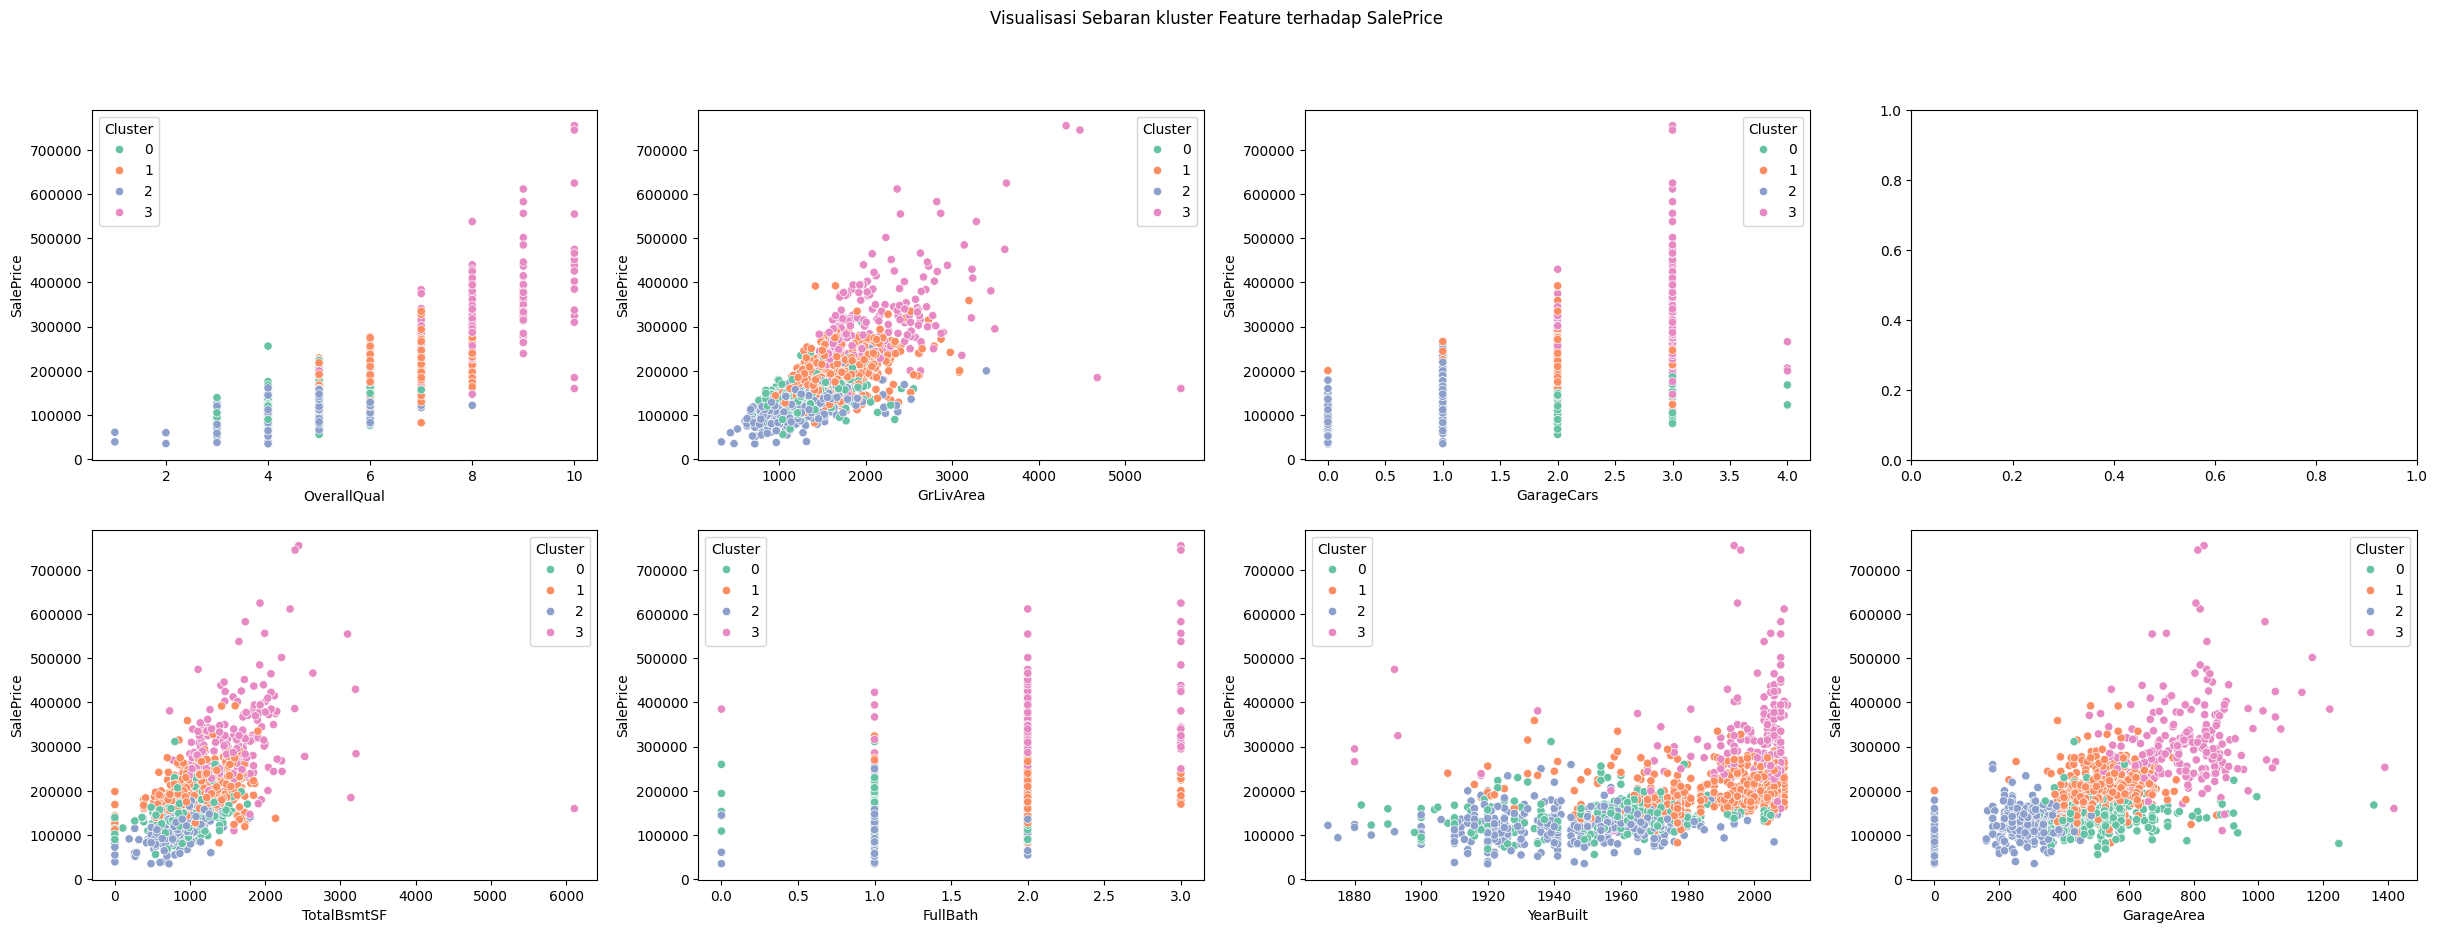

In [16]:
# Menambahkan kolom 'Cluster' ke DataFrame untuk menyimpan hasil klustering
data['Cluster'] = labels

# Mendefinisikan fitur yang digunakan untuk visualisasi kluster terhadap harga penjualan
# features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Membuat subplot 2 baris x 4 kolom untuk menampilkan scatter plot setiap fitur dengan SalePrice
fig, axes = plt.subplots(2, 4, figsize=(30, 10))
fig.suptitle('Visualisasi Sebaran kluster Feature terhadap SalePrice')

# Menampilkan scatter plot untuk tiap fitur terhadap SalePrice, dengan pewarnaan berdasarkan kluster
sns.scatterplot(ax=axes[0, 0], x='OverallQual', y='SalePrice', hue='Cluster', data=data, palette='Set2')
sns.scatterplot(ax=axes[0, 1], x='GrLivArea', y='SalePrice', hue='Cluster', data=data, palette='Set2')
sns.scatterplot(ax=axes[0, 2], x='GarageCars', y='SalePrice', hue='Cluster', data=data, palette='Set2')
sns.scatterplot(ax=axes[1, 3], x='GarageArea', y='SalePrice', hue='Cluster', data=data, palette='Set2')
sns.scatterplot(ax=axes[1, 0], x='TotalBsmtSF', y='SalePrice', hue='Cluster', data=data, palette='Set2')
sns.scatterplot(ax=axes[1, 1], x='FullBath', y='SalePrice', hue='Cluster', data=data, palette='Set2')
sns.scatterplot(ax=axes[1, 2], x='YearBuilt', y='SalePrice', hue='Cluster', data=data, palette='Set2')
